In [ ]:
! wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"

--2021-03-14 08:58:31--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  5.04MB/s    in 6m 39s  

2021-03-14 09:05:11 (4.78 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [41]:
from google.colab import drive
drive.mount('/content/gdrive/')

KeyboardInterrupt: ignored

In [ ]:
!cp "/content/VOCtrainval_11-May-2012.tar" "/content/gdrive/MyDrive"

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data
import pandas as pd
data = pd.read_csv("/content/letter-recognition.data",sep=',')

In [3]:
data

,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


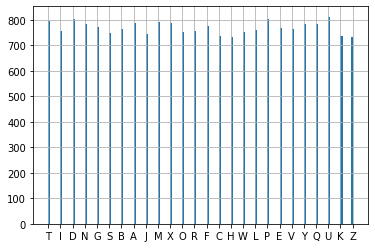

In [40]:
data['Label'].hist(bins=150)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, hinge_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

alph = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}

In [36]:
def kt_svm(train, n, k, q, n2, ker, deg=2):
  ## taking N random samples from train
  random_n = train.sample(n)
  ## training with SVMC
  temp_x = random_n.drop('Label', axis=1)
  temp_y = random_n['Label']
  
  if ker == "linear":
    temp_clf = SVC(kernel = ker)
  elif ker == "rbf":
    temp_clf = SVC(kernel = ker, random_state = 0)
  elif ker == "sigmoid":
    temp_clf = SVC(kernel = ker)
  elif ker == "poly":
    temp_clf = SVC(kernel = ker, degree = deg)

  temp_clf.fit(temp_x, temp_y)
  ## let i = 0
  i = 0
  N = []
  # while True:
    ## set N_i and t
  N.append(0)
  t = 1
  ## take one random sample from train
  one = train.sample()
  if(N[i]%2==0):
    N[i] = N[i] + 1

  df_store = []
  while True:
    ## take another sample
    ano = train.sample()
    ncpt = 0
    ## calculate ratio
    one_x = one.drop('Label', axis=1)
    one_y = one['Label']
    one_i = alph[one_y.values[0]]
    one_dec = temp_clf.decision_function(one_x)
    # one_pred = one_dec[0, one_i]
    one_pred = max(one_dec[0])

    ano_x = ano.drop('Label', axis=1)
    ano_y = ano['Label']
    # print(ano_y.values[0])
    ano_i = alph[ano_y.values[0]]
    ano_dec = temp_clf.decision_function(ano_x)
    # ano_pred = ano_dec[0, ano_i]
    ano_pred = max(ano_dec[0])

    alfa = np.exp(np.log2(abs(ano_pred/one_pred)))
    ## conditions
    if round(alfa, 2) == 1 or alfa > 1 or ncpt == n2:
      ## accept second sample
      df_store.append(ano)
      ncpt = 0
    else:
      ncpt += 1
      continue
    
    N[i] = N[i] + 1
    one = ano
    # print(N_i)
    
    if N[i] < n/2:
      continue
    else:
      break
  ## train N markov samples
  df_mar = pd.concat(df_store)
  temp_x = df_mar.drop('Label', axis=1)
  temp_y = df_mar['Label']

  if ker == "linear":
    temp_clf = SVC(kernel = ker)
  elif ker == "rbf":
    temp_clf = SVC(kernel = ker, random_state = 0)
  elif ker == "sigmoid":
    temp_clf = SVC(kernel = ker)
  elif ker == "poly":
    temp_clf = SVC(kernel = ker, degree = deg)

  temp_clf.fit(temp_x, temp_y)

    # if i < k:
      # continue
    # else:
      # break
  return temp_clf

In [37]:
num = round(len(data)*0.8)
train, test = data[:num], data[num:]

In [38]:
test_x = test.drop('Label', axis=1)
test_y = test['Label']

In [39]:
kt_clf = kt_svm(train, 100, 1, 1.2, 10, "linear")
kt_pred = kt_clf.predict(test_x)
print(classification_report(test_y, kt_pred))

              precision    recall  f1-score   support

           A       0.81      0.84      0.83       156
           B       0.24      0.31      0.27       136
           C       0.46      0.72      0.56       142
           D       0.46      0.32      0.38       167
           E       0.42      0.13      0.20       152
           F       0.19      0.41      0.26       153
           G       0.00      0.00      0.00       164
           H       0.07      0.12      0.09       151
           I       0.38      0.57      0.45       165
           J       0.70      0.45      0.55       148
           K       0.28      0.69      0.40       146
           L       0.12      0.06      0.08       157
           M       0.74      0.77      0.76       144
           N       0.26      0.38      0.31       166
           O       0.18      0.76      0.29       139
           P       0.77      0.30      0.43       168
           Q       0.00      0.00      0.00       168
           R       0.47    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
kt_clf = kt_svm(train, 100, 1, 1.2, 10, "rbf")
kt_pred = kt_clf.predict(test_x)
print(classification_report(test_y, kt_pred))

              precision    recall  f1-score   support

           A       0.82      0.72      0.76       156
           B       0.07      0.40      0.11       136
           C       0.00      0.00      0.00       142
           D       0.10      0.53      0.16       167
           E       0.34      0.32      0.33       152
           F       0.00      0.00      0.00       153
           G       0.27      0.16      0.20       164
           H       0.00      0.00      0.00       151
           I       0.00      0.00      0.00       165
           J       1.00      0.03      0.07       148
           K       0.00      0.00      0.00       146
           L       0.45      0.63      0.52       157
           M       0.23      0.94      0.37       144
           N       0.66      0.19      0.29       166
           O       0.00      0.00      0.00       139
           P       0.13      0.80      0.23       168
           Q       0.00      0.00      0.00       168
           R       0.77    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
kt_clf = kt_svm(train, 100, 1, 1.2, 10, "poly")
kt_pred = kt_clf.predict(test_x)
print(classification_report(test_y, kt_pred))

              precision    recall  f1-score   support

           A       0.82      0.47      0.60       156
           B       0.14      0.48      0.22       136
           C       0.05      0.09      0.06       142
           D       0.00      0.00      0.00       167
           E       0.21      0.47      0.29       152
           F       0.31      0.29      0.30       153
           G       0.34      0.27      0.30       164
           H       0.00      0.00      0.00       151
           I       0.00      0.00      0.00       165
           J       0.64      0.48      0.55       148
           K       0.41      0.24      0.30       146
           L       0.75      0.73      0.74       157
           M       0.00      0.00      0.00       144
           N       0.33      0.05      0.09       166
           O       0.00      0.00      0.00       139
           P       0.67      0.61      0.64       168
           Q       0.35      0.13      0.19       168
           R       0.25    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
kt_clf = kt_svm(train, 100, 1, 1.2, 20, "sigmoid")
kt_pred = kt_clf.predict(test_x)
print(classification_report(test_y, kt_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       156
           B       0.00      0.00      0.00       136
           C       0.00      0.00      0.00       142
           D       0.00      0.00      0.00       167
           E       0.00      0.00      0.00       152
           F       0.00      0.00      0.00       153
           G       0.00      0.00      0.00       164
           H       0.00      0.00      0.00       151
           I       0.00      0.00      0.00       165
           J       0.00      0.00      0.00       148
           K       0.04      1.00      0.07       146
           L       0.00      0.00      0.00       157
           M       0.00      0.00      0.00       144
           N       0.00      0.00      0.00       166
           O       0.00      0.00      0.00       139
           P       0.00      0.00      0.00       168
           Q       0.00      0.00      0.00       168
           R       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
